# Import libraries

In [16]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

# Import dataset

In [17]:
path = "../data/raw/advertising.csv"
df = pd.read_csv(path)
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


# Initial Data Exploration

In [18]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [20]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


# Data cleaning

<Axes: >

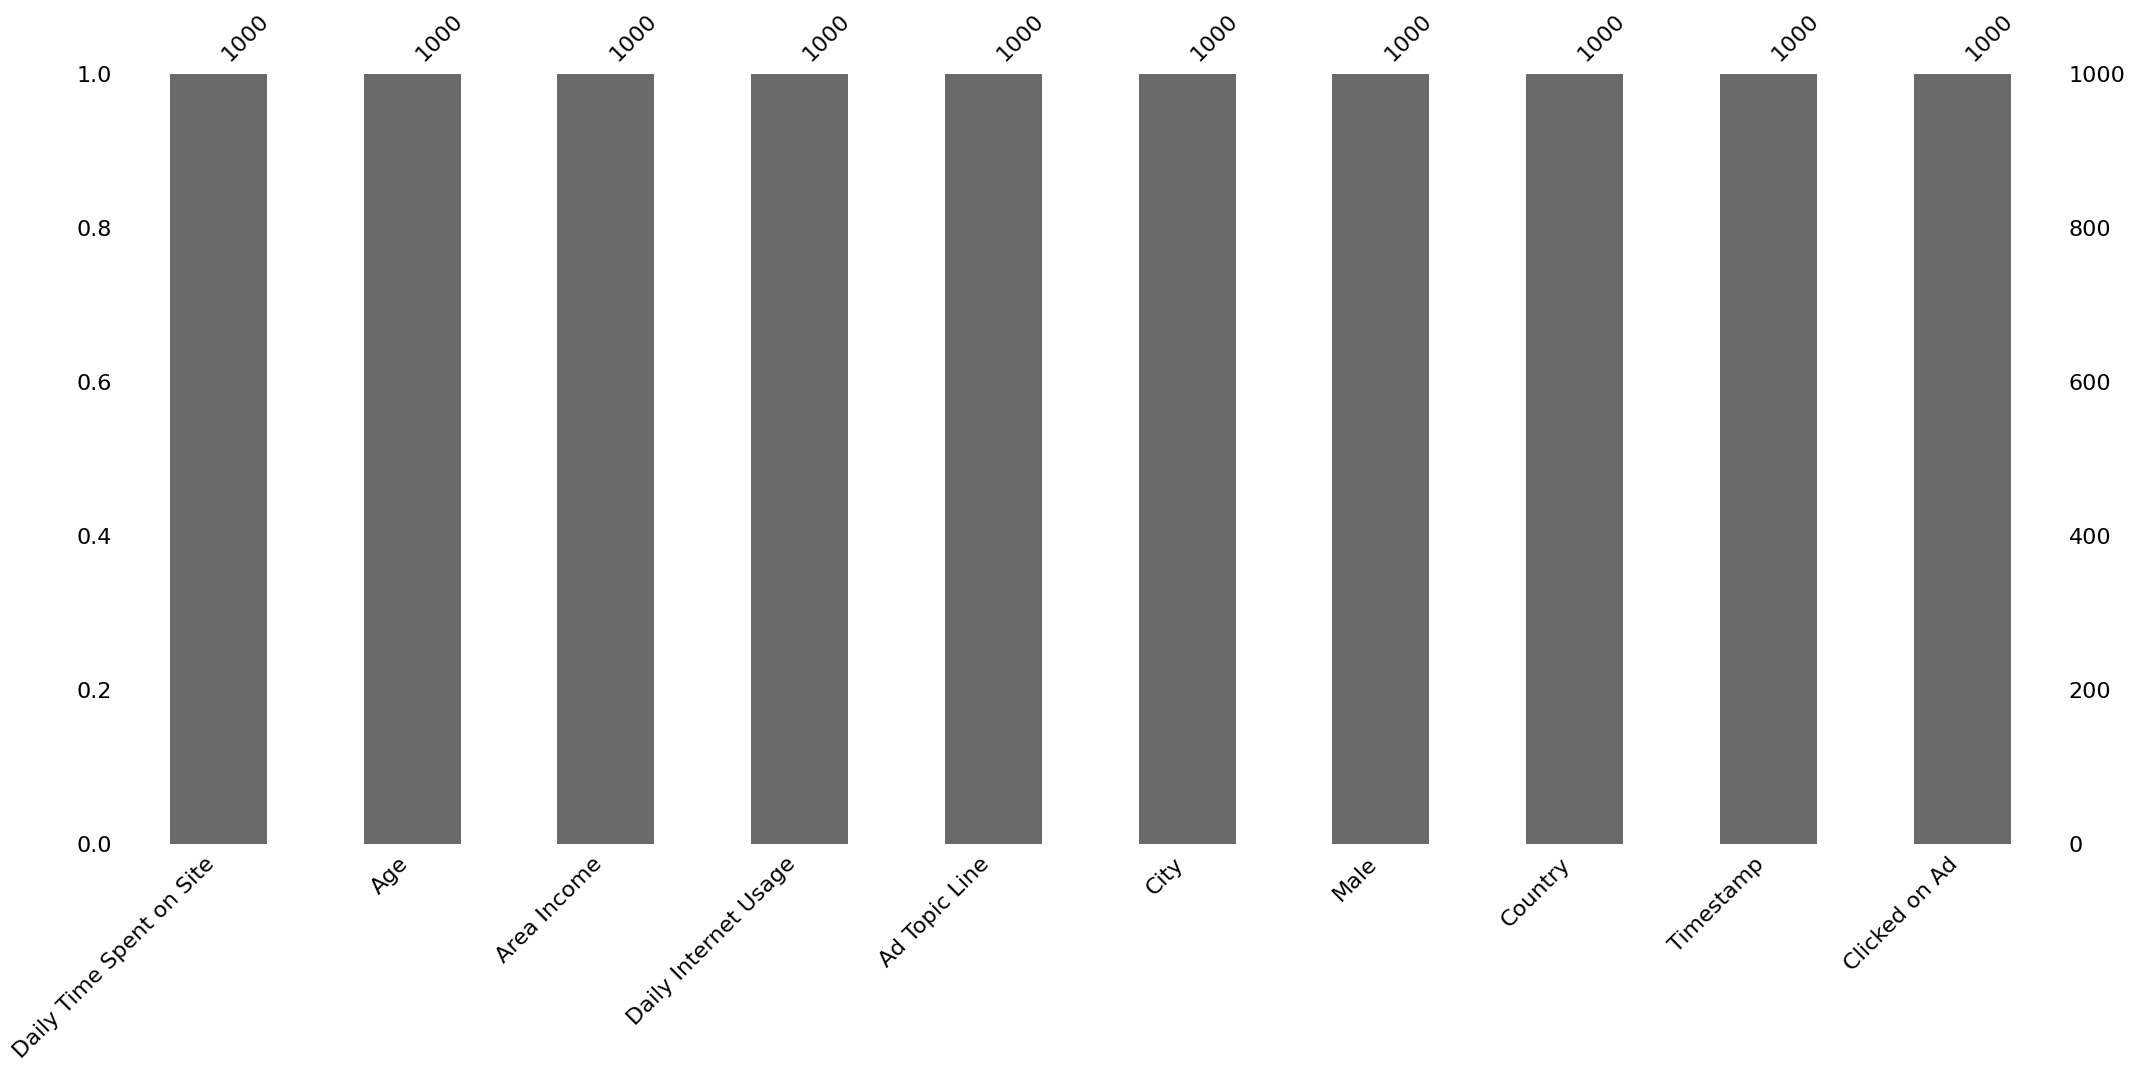

In [21]:
%matplotlib inline
msno.bar(df)

<Axes: >

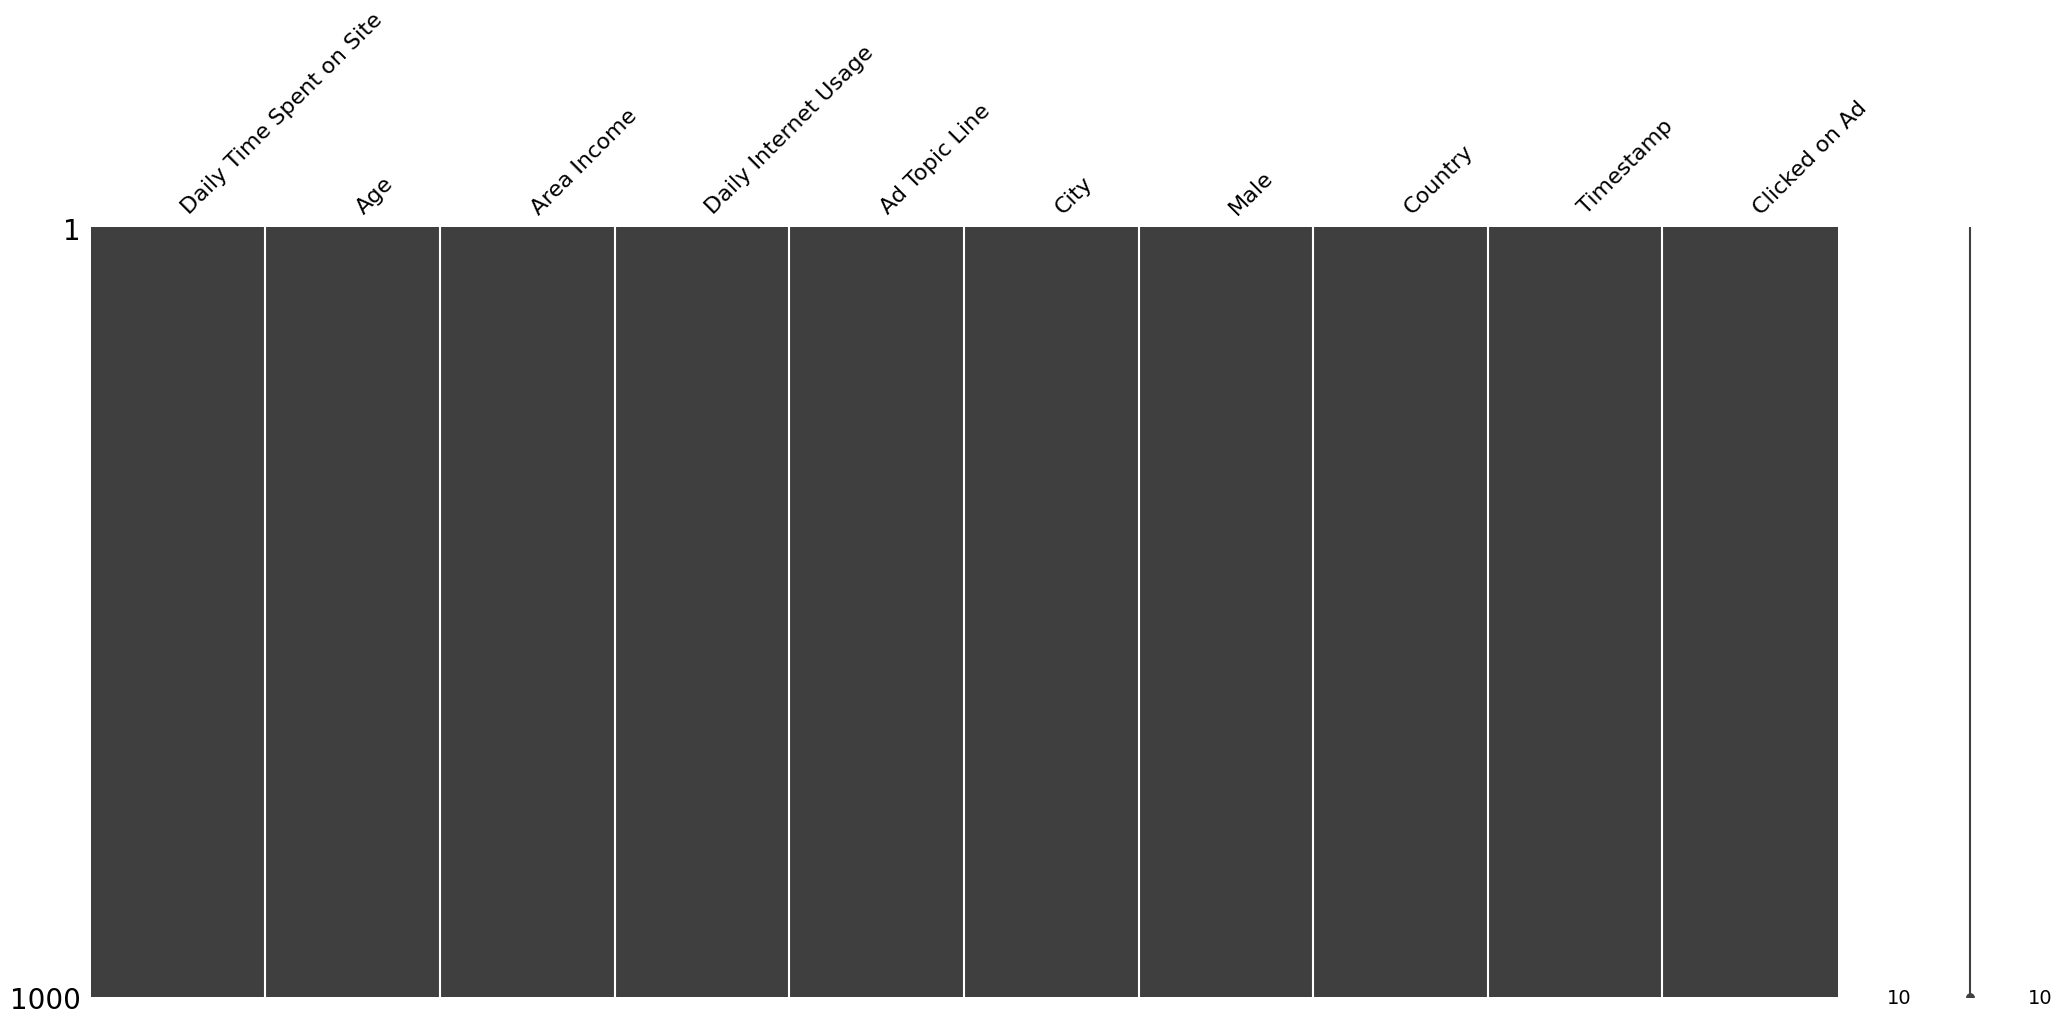

In [22]:
msno.matrix(df)

c:\Users\lenovo\e-commerce-data-analysis\venv\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\Users\lenovo\e-commerce-data-analysis\venv\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

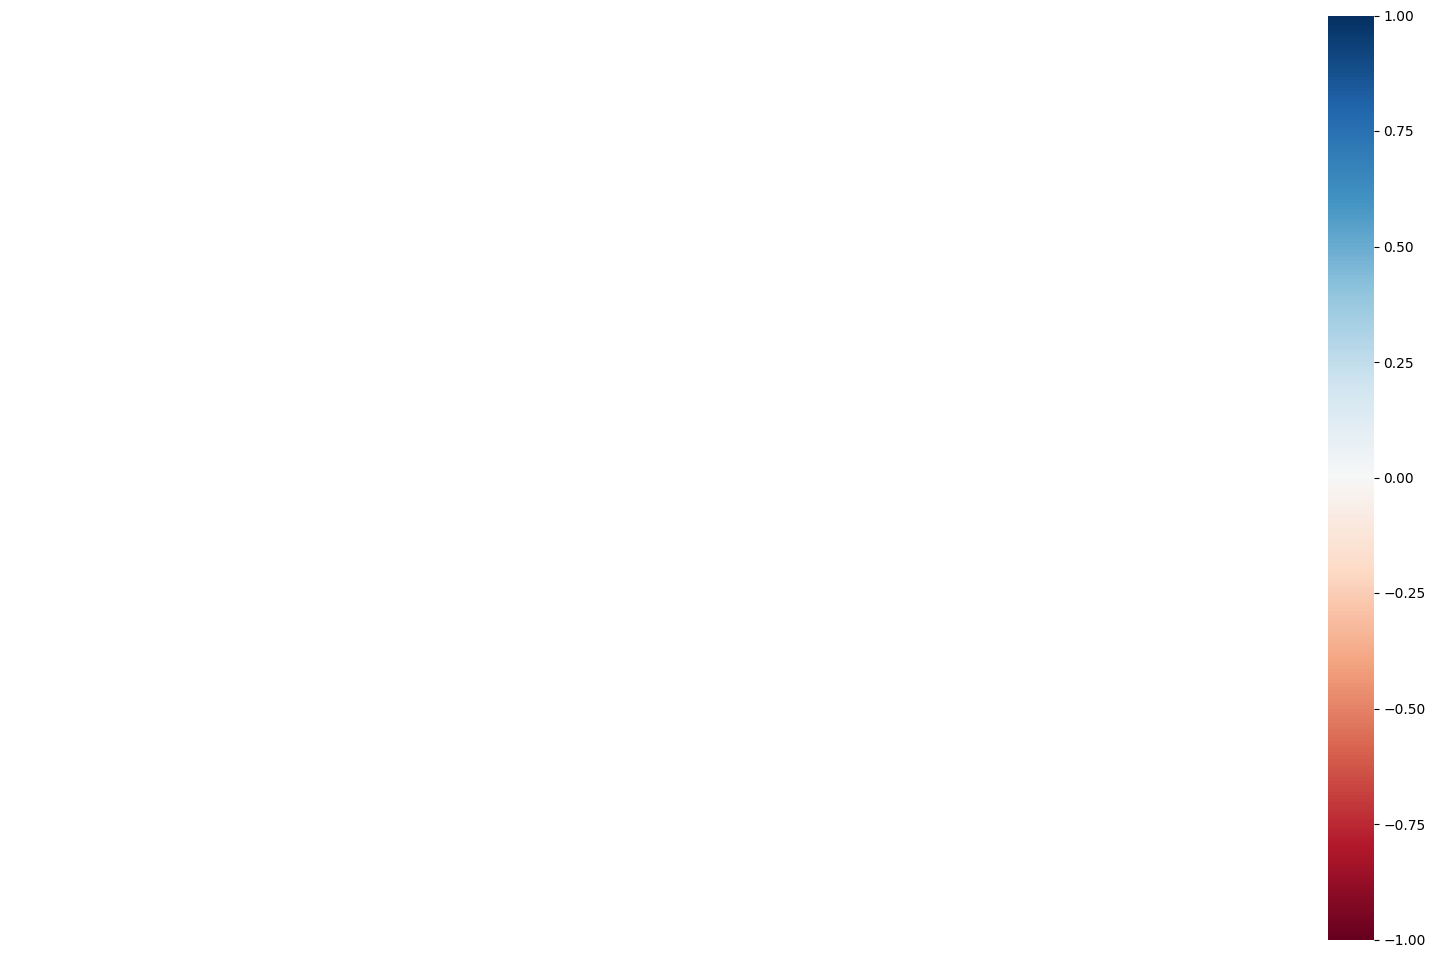

In [23]:
msno.heatmap(df)

In [27]:
df.drop_duplicates(inplace=True)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


# Data preprocessing

In [31]:
from sklearn.preprocessing import LabelEncoder

le = dict()
for col in ['Ad Topic Line', 'City', 'Country']:
    le[col] = LabelEncoder()
    df[col] = le[col].fit_transform(df[col])

df.sort_values(by='Ad Topic Line', ascending=False)
df.sort_values(by='City', ascending=False)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
911,67.56,47,50628.31,109.98,740,968,0,164,2016-02-12 05:20:19,1
41,64.24,30,59784.18,252.36,310,967,0,215,2016-04-16 11:53:43,0
474,47.48,31,29359.20,141.34,747,966,0,63,2016-06-30 00:19:33,1
182,62.95,60,36752.24,157.04,622,965,0,165,2016-05-24 13:30:38,1
101,63.60,23,51864.77,235.28,84,964,1,188,2016-06-01 09:27:34,0
...,...,...,...,...,...,...,...,...,...,...
280,46.37,52,32847.53,144.27,171,4,0,71,2016-01-05 00:02:53,1
481,83.26,40,70225.60,187.76,177,3,1,213,2016-01-02 14:36:03,0
920,81.05,34,54045.39,245.50,105,2,0,127,2016-05-18 00:07:43,0
870,45.82,27,64410.80,171.24,262,1,1,63,2016-02-10 20:43:38,1


In [42]:
def remove_outliers(df, column: str):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[df[column].between(lower_bound, upper_bound)]
    return df

for i in ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']:
    df = remove_outliers(df, i)

df.info()
df.head(10)


<class 'pandas.core.frame.DataFrame'>
Index: 990 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  990 non-null    float64       
 1   Age                       990 non-null    int64         
 2   Area Income               990 non-null    float64       
 3   Daily Internet Usage      990 non-null    float64       
 4   Ad Topic Line             990 non-null    int64         
 5   City                      990 non-null    int64         
 6   Male                      990 non-null    int64         
 7   Country                   990 non-null    int64         
 8   Timestamp                 990 non-null    datetime64[ns]
 9   Clicked on Ad             990 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(6)
memory usage: 85.1 KB


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,91,961,0,215,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,464,903,1,147,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,566,111,0,184,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,903,939,1,103,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,766,805,0,96,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,805,282,1,158,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,222,46,0,145,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,723,671,1,12,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,107,884,1,82,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,454,712,1,78,2016-07-11 01:42:51,0


# Exploratory Data Analysis

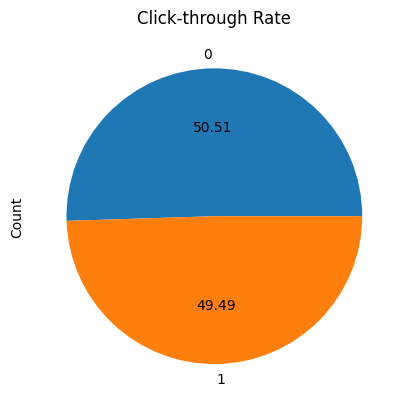

In [54]:
click_counts = df['Clicked on Ad'].value_counts()
click_counts.plot(kind='pie', autopct='%.2f')

plt.title('Click-through Rate')
plt.ylabel('Count')
plt.show()